<a href="https://colab.research.google.com/github/Gyangpam/STAGE-E-TAG-ALONG-CODE/blob/main/STAGE_E_TAG_ALONG_CODES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Time Series Analysis & Forecast Tag Along Codes**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
df=pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")

In [4]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


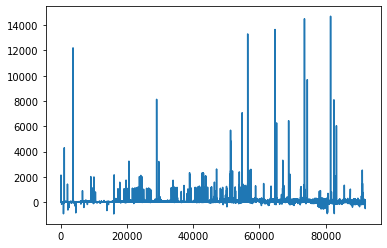

In [5]:
df.ElecPrice.plot()

In [6]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [8]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [9]:
df=df.rename(columns = {"FullDate": "ds", "ElecPrice": "y", "SysLoad": "add1", "Tmax":"add2", "GasPrice":"add3" })

In [10]:
df.tail()

,ds,add2,add1,add3,y
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000
92015,2021-02-28 23:00:00,24.3,714.69630,5.4848,62.955


In [11]:
df["ds"]=pd.to_datetime(df["ds"])
df.head()

,ds,add2,add1,add3,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


# `QUESTION 11`

Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

Text(0, 0.5, 'ElecPrice')

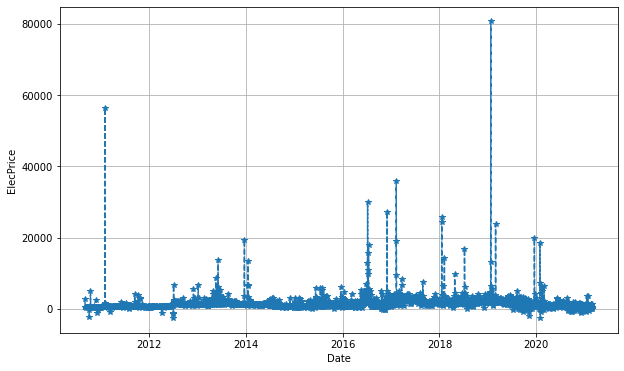

In [14]:
df.set_index("ds",inplace=True,drop=True)
dfd=df.resample("D").sum()
plt.figure(figsize=(10,6))
plt.plot(dfd.index, dfd.y, '--', marker='*', )
plt.grid()
plt.xlabel('Date')
plt.ylabel('ElecPrice')

## **QUESTION 12**

Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [15]:
from statsmodels.tsa.stattools import adfuller
#recall {"FullDate": "ds", "ElecPrice": "y", "SysLoad": "add1", "Tmax":"add2", "GasPrice":"add3" }
a=adfuller(dfd['add1'])
b=adfuller(dfd['add3'])
print(a)
print(b)
print('The p-value for SysLoad is:',np.round(a[1],decimals=6))
print('The p-value for GasPrice is:',np.round(b[1],decimals=6))

(-3.6901589888366457, 0.004253725504574117, 30, 3803, {'1%': -3.432070672988693, '5%': -2.8623002987378547, '10%': -2.567174716967499}, 79103.01504886392)
(-2.90276669716518, 0.04502721288462542, 27, 3806, {'1%': -3.4320693157877544, '5%': -2.8622996992165364, '10%': -2.5671743978048323}, 32857.5394299048)
The p-value for SysLoad is: 0.004254
The p-value for GasPrice is: 0.045027


## **QUESTION 13**

Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [16]:
#recall {"FullDate": "ds", "ElecPrice": "y", "SysLoad": "add1", "Tmax":"add2", "GasPrice":"add3" }
c=adfuller(dfd['add3'])
d=adfuller(dfd['y'])
print(c)
print(d)
print('10% critical value for GasPrice:',np.round(c[4]['10%'],decimals=4))
print('5% critical value for ElecPrice:',np.round(c[4]['5%'],decimals=4))

(-2.90276669716518, 0.04502721288462542, 27, 3806, {'1%': -3.4320693157877544, '5%': -2.8622996992165364, '10%': -2.5671743978048323}, 32857.5394299048)
(-8.269053866873803, 4.848817773711633e-13, 20, 3813, {'1%': -3.432066157296446, '5%': -2.8622983040036005, '10%': -2.5671736550459663}, 69130.36360776308)
10% critical value for GasPrice: -2.5672
5% critical value for ElecPrice: -2.8623


## **QUESTION 14**

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

Hint:

Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it.

In [17]:
dfd.reset_index(inplace=True)
train=dfd.iloc[:2757]
test=dfd.iloc[2757:]
train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)

In [18]:
assert len(dfd)==(len(train)+len(test))
dfd.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [19]:
model=Prophet()
model.fit(train)
model.component_modes

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyip23sg_/sbk4ntx5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyip23sg_/yygxdelj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52571', 'data', 'file=/tmp/tmpyip23sg_/sbk4ntx5.json', 'init=/tmp/tmpyip23sg_/yygxdelj.json', 'output', 'file=/tmp/tmpyip23sg_/prophet_model85pqn45j/prophet_model-20221013112329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:23:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:23:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [20]:
x_test=test.drop('y',axis=1)
y_test=test["y"]
future = model.make_future_dataframe(periods=1077, freq='D', include_history = False) 
forecast = model.predict(future) 
pred=forecast["yhat"]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,2521.998098,140.071072,4676.050600,2676.996143,2676.996143,2676.996143
1,2018-03-21,2675.181324,179.752514,5053.594628,2677.763256,2677.763256,2677.763256
2,2018-03-22,2774.036399,358.887373,5161.567795,2678.530368,2678.530368,2678.530368
3,2018-03-23,2566.035844,127.722501,4857.140948,2679.297480,2679.297480,2679.297480
4,2018-03-24,2241.126584,-135.612135,4676.223306,2680.064592,2680.064592,2680.064592
...,...,...,...,...,...,...,...
1072,2021-02-24,3410.743291,563.981274,6178.758050,3499.340422,1857.463404,5085.520280
1073,2021-02-25,3477.583734,740.355648,6453.102579,3500.107534,1855.856060,5089.305613
1074,2021-02-26,3244.380463,343.484738,6202.557807,3500.874646,1854.205700,5093.418178
1075,2021-02-27,2901.031053,-101.203483,5766.056048,3501.641758,1852.154761,5099.418245


In [21]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(y_test,pred)*100
print("The MAPE (in %) to 2 decimal places is :{:.2f}".format(MAPE))

The MAPE (in %) to 2 decimal places is :539.22


# QUESTION 15

What is the RMSE in 2 decimal places?

In [22]:
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(y_test,pred, squared=False)
print("The MAPE (in %) to 2 decimal places is :{:.2f}".format(RMSE))

The MAPE (in %) to 2 decimal places is :3196.64


## **QUESTION 16**

If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

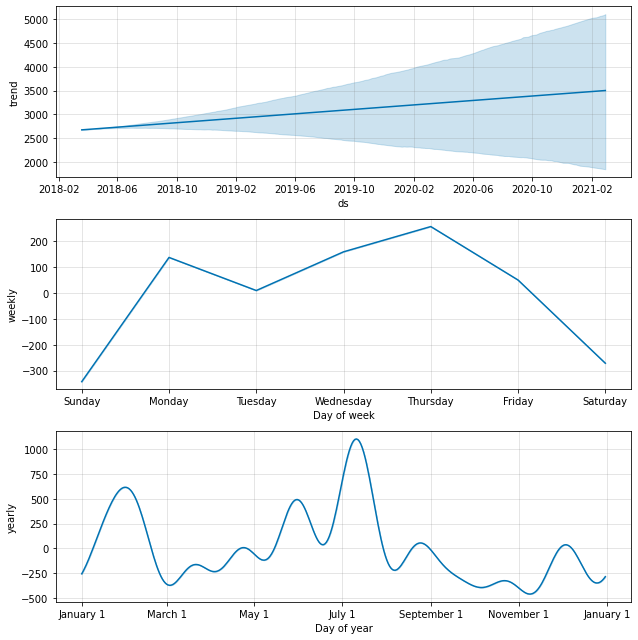

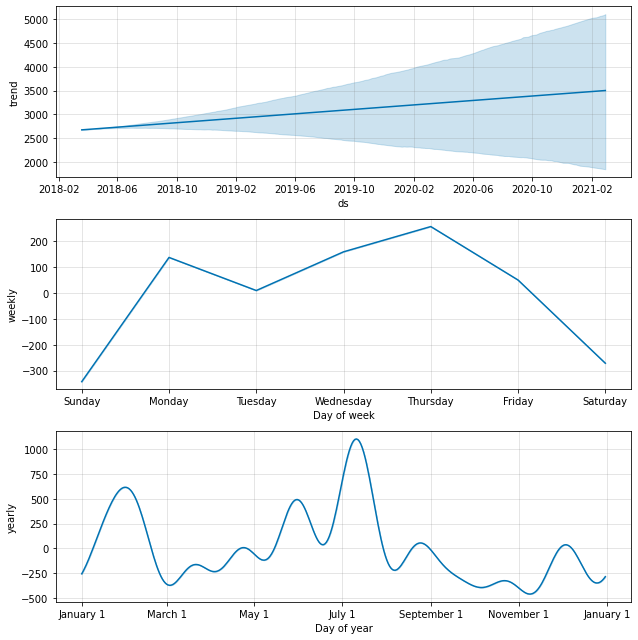

In [23]:
model.plot_components(forecast)

From the yearly plot the month with the highest seasonality value is July

## **QUESTION 17**

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [25]:
model=Prophet()
model.add_regressor("add1")
model.add_regressor("add2")
model.add_regressor("add3")
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyip23sg_/4qcmk3v2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyip23sg_/jaqti0qq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27260', 'data', 'file=/tmp/tmpyip23sg_/4qcmk3v2.json', 'init=/tmp/tmpyip23sg_/jaqti0qq.json', 'output', 'file=/tmp/tmpyip23sg_/prophet_model1z__p9fr/prophet_model-20221013113149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:31:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:31:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
X_test=test.drop("y", axis=1)
y_test=test["y"]
forecast=model.predict(X_test)
pred=forecast['yhat']
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,1988.494818,-262.770215,4334.940845,1867.223392,1867.223392,1867.223392
1,2018-03-21,1980.063539,-295.811535,4487.794303,1867.913438,1867.913438,1867.913438
2,2018-03-22,2899.369177,513.542984,5000.231800,1868.603483,1868.603483,1868.603483
3,2018-03-23,2583.628888,362.766864,4728.769793,1869.293529,1869.293529,1869.293529
4,2018-03-24,1437.347502,-785.465755,3670.678217,1869.983574,1869.983574,1869.983574
...,...,...,...,...,...,...,...
1072,2021-02-24,961.208123,-1549.613929,3344.767624,2606.952122,1844.362559,3331.114869
1073,2021-02-25,1320.421177,-1066.909821,3526.226637,2607.642167,1844.940222,3332.246217
1074,2021-02-26,1383.914142,-1078.091471,3724.908273,2608.332213,1844.481810,3333.377565
1075,2021-02-27,1038.834888,-1401.627889,3367.483313,2609.022258,1843.697027,3334.508913


In [28]:
MAPE=mean_absolute_percentage_error(y_test,pred)*100
print("The MAPE (in %) to 2 decimal places is :{:.2f}".format(MAPE))

The MAPE (in %) to 2 decimal places is :232.43


## **QUESTION 18**

What is the RMSE in 2 decimal places?

In [29]:
RMSE=mean_squared_error(y_test,pred, squared=False)
print("The MAPE (in %) to 2 decimal places is :{:.2f}".format(RMSE))

The MAPE (in %) to 2 decimal places is :2708.17


## **QUESTION 19**

If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

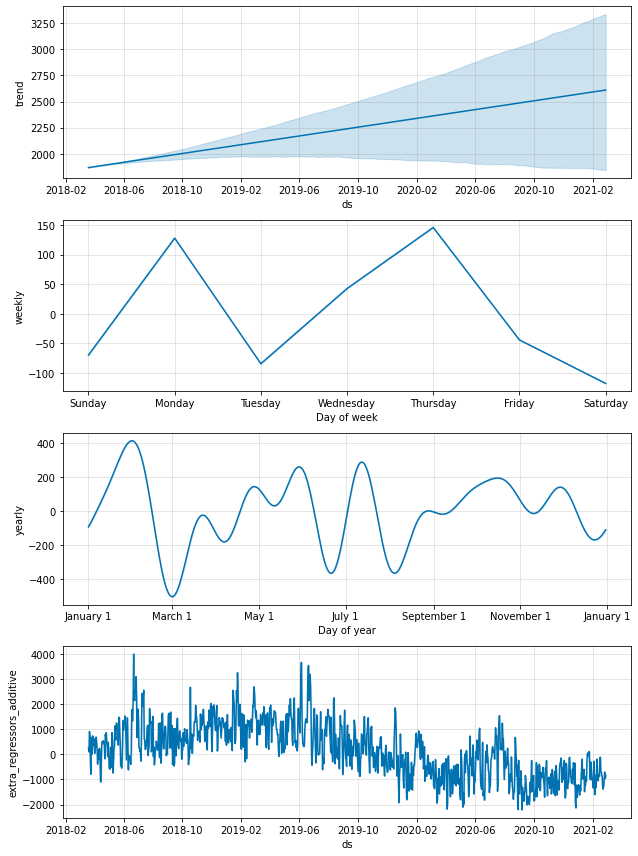

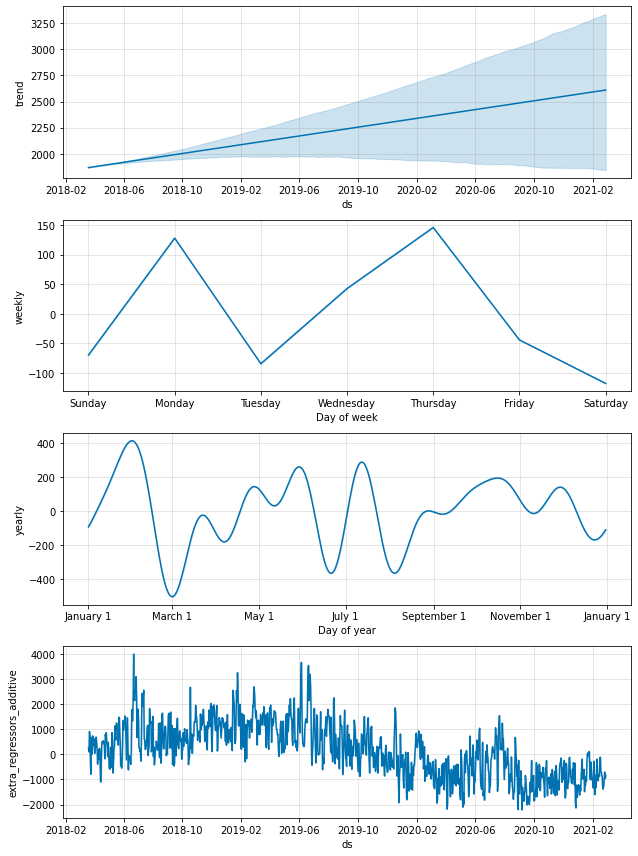

In [32]:
model.plot_components(forecast)

The day of the daily seasonality with the highest value is Thursday

## **QUESTION 20**

Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),

What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

In [33]:
train=train.drop('add2',axis=1)
test=test.drop('add2',axis=1)
train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)

In [34]:
model=Prophet()
model.add_regressor("add1")
model.add_regressor("add3")
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyip23sg_/kaalgfil.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyip23sg_/d0l0f9ok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23721', 'data', 'file=/tmp/tmpyip23sg_/kaalgfil.json', 'init=/tmp/tmpyip23sg_/d0l0f9ok.json', 'output', 'file=/tmp/tmpyip23sg_/prophet_model0s0p0w4q/prophet_model-20221013115211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:52:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:52:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [35]:
X_test=test.drop("y", axis=1)
y_test=test["y"]
forecast=model.predict(X_test)
pred=forecast['yhat']
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,1988.154678,-105.761448,4148.142233,1867.830813,1867.830813,1867.830813
1,2018-03-21,1979.613884,-89.566286,4443.338492,1868.521551,1868.521551,1868.521551
2,2018-03-22,2899.301882,643.377913,5021.320037,1869.212289,1869.212289,1869.212289
3,2018-03-23,2584.013509,250.844953,4919.846880,1869.903028,1869.903028,1869.903028
4,2018-03-24,1436.700243,-569.705414,3698.199283,1870.593766,1870.593766,1870.593766
...,...,...,...,...,...,...,...
1072,2021-02-24,959.967485,-1230.336842,3330.873333,2608.302297,1771.487959,3412.188111
1073,2021-02-25,1319.116986,-1045.414820,3575.191359,2608.993035,1770.718819,3413.775160
1074,2021-02-26,1383.548481,-975.376292,3768.875970,2609.683774,1769.949680,3415.330473
1075,2021-02-27,1038.155719,-1354.308047,3548.373391,2610.374512,1769.180882,3416.885785


In [36]:
MAPE=mean_absolute_percentage_error(y_test,pred)*100
print("The MAPE (in %) to 2 decimal places is :{:.2f}".format(MAPE))

The MAPE (in %) to 2 decimal places is :232.38
